In [1]:
import matplotlib.pyplot as plt
import numpy as np
def plot_Extremecase(data, metrics,methods,datasets):
    """
    绘制柱状图，一个数据集对应一个子图，比较数据集在不同方法运行下的结果指标

    参数：
    data:双层嵌套字典， 第一层键为数据集名，第二层键为方法名，值为对应指标数值列表
    metrics：字符串列表，指标名称
    methods:字符串列表，方法名称
    datasets：字符串列表，数据集名称列表

    配色：
    colors = {'DTPTrajRec': '#4C72B0', 'MM-STGED': '#DD8452'}
    """
    # 设置图形大小
    plt.figure(figsize=(16, 6.5))  # 增加图形高度
    
    # 定义柱子宽度
    bar_width = 0.35  # 调整柱子宽度
    
    # 定义位置
    index = np.arange(len(metrics))  # Index for metrics
    
    # 定义颜色和图案填充
    colors = {'DTPTrajRec': '#4C72B0', 'MM-STGED': '#DD8452'}  # 更柔和的颜色
    hatches = {'DTPTrajRec': '/', 'MM-STGED': '\\'}         # 图案填充
    
    # 绘制每个数据集
    for i, dataset in enumerate(datasets):
        ax = plt.subplot(1, 2, i+1)
        
        # 创建双 y 轴
        ax2 = ax.twinx()
        
        # 绘制 Acc, Recall, Prec（左侧 y 轴）
        for j, method in enumerate(methods):
            values = data[dataset][method][:3]  # 前三个指标：Acc, Recall, Prec
            ax.bar(index[:3] + (j - 0.5)*bar_width, values, bar_width, 
                   color=colors[method], hatch=hatches[method], edgecolor='black', label=method if i==0 else "")
        
        # 绘制 MAE, RMSE（右侧 y 轴）
        for j, method in enumerate(methods):
            values = data[dataset][method][3:]  # 后两个指标：MAE, RMSE
            ax2.bar(index[3:] + (j - 0.5)*bar_width, values, bar_width, 
                    color=colors[method], hatch=hatches[method], edgecolor='black', label=method if i==0 else "")
        
        # 设置标题和 x 轴标签
        plt.title(f'{dataset}', fontsize=22, pad=10, fontweight='bold')  # 加粗标题
        ax.set_xticks(index)
        ax.set_xticklabels(metrics, rotation=0, fontsize=18)
        
        # 设置左侧 y 轴范围（自适应）
        left_values = [data[dataset][method][:3] for method in methods]  # 获取所有左侧 y 轴的值
        left_min = min([min(values) for values in left_values])  # 最小值
        left_max = max([max(values) for values in left_values])  # 最大值
        ax.set_ylim(bottom=left_min * 0.9, top=left_max * 1.1)  # 设置范围
        
        # 设置右侧 y 轴范围（自适应）
        right_values = [data[dataset][method][3:] for method in methods]  # 获取所有右侧 y 轴的值
        right_min = min([min(values) for values in right_values])  # 最小值
        right_max = max([max(values) for values in right_values])  # 最大值
        ax2.set_ylim(bottom=right_min * 0.9, top=right_max * 1.1)  # 设置范围
    
        # 设置左侧 y 轴格式
        ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax.tick_params(axis='y', labelsize=22)
        
        # 设置右侧 y 轴格式
        ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax2.tick_params(axis='y', labelsize=22)
        
        ax.legend(methods, fontsize=20, loc='upper left', bbox_to_anchor=(0, 1.04), frameon=False)  # 图例无边框
    
        # 添加左侧 y 轴标签
        if i == 0:
            ax.set_ylabel('Acc, Recall, Prec', fontsize=22, rotation=90, labelpad=20)
        
        # 添加右侧 y 轴标签
        if i == 1:
            ax2.set_ylabel('MAE, RMSE', fontsize=22, rotation=270, labelpad=20)
    
    # 设置全局字体样式为Times New Roman
    plt.rc('font', family='Times New Roman')
    
    # 手动调整子图间距和边距
    plt.subplots_adjust(top=0.88, bottom=0.15, left=0.08, right=0.92, wspace=0.4)  # 调整边距和子图间距
    
    # 保存图形
    plt.savefig('metric_comparison_by_dataset_dual_axis.pdf', dpi=300, bbox_inches='tight', format='pdf')
    
    # 显示图形
    plt.show()

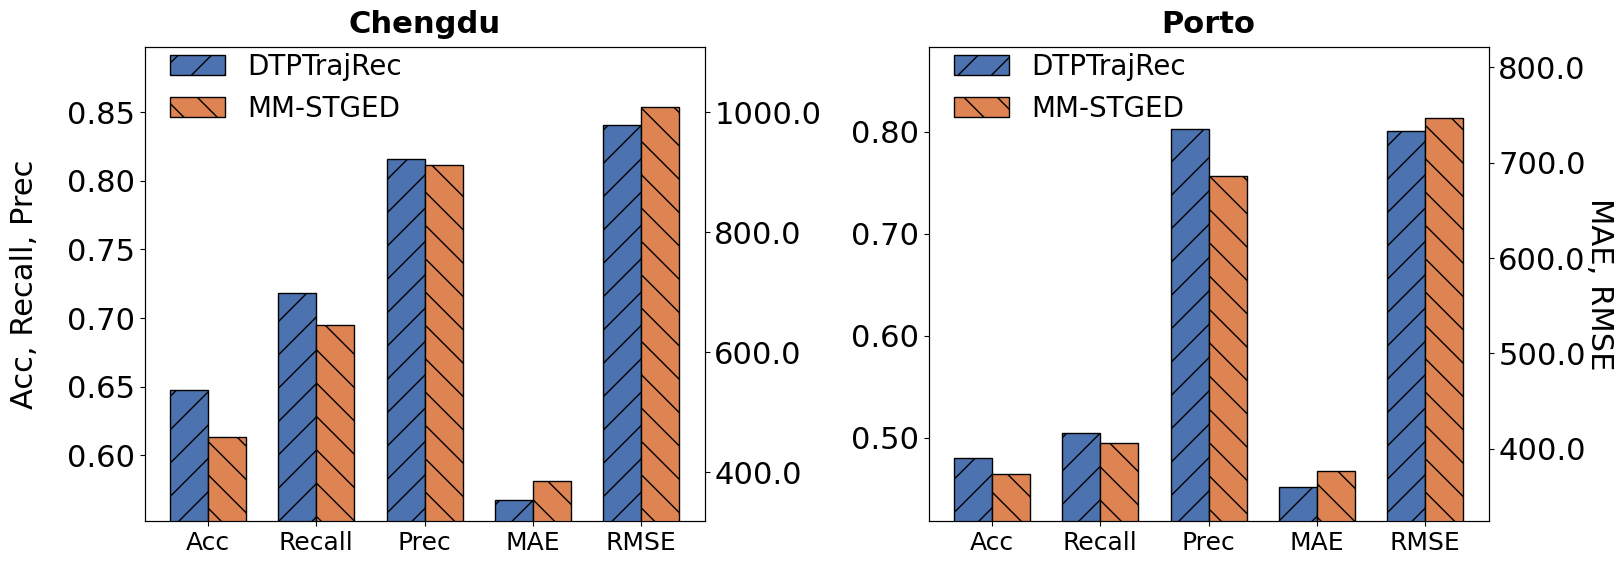

In [2]:
# 组织数据
data = {
    'Chengdu': {
        'DTPTrajRec': [0.6474910939382555, 0.718160109994642, 0.8159463277851821, 353.93245811897583, 978.3475055118736],  # acc, recall, precision, mae, rmse
        'MM-STGED': [0.6131418339355754, 0.6951809314959185, 0.8117560519637403, 
                     385.64595566044903, 1008.4139400551342]
    },
    'Porto': {
        'DTPTrajRec': [0.4803193310540323, 0.5046870307577568, 0.8029130929965906, 359.98541058112556, 733.3755310874624],
        'MM-STGED': [0.4642806807984491, 0.49413940990986804, 0.7567521790020945, 376.27877863403205, 746.705244384115]
    }
}

# 指标名称
metrics = ['Acc', 'Recall', 'Prec', 'MAE', 'RMSE']

# 方法名称
methods = ['DTPTrajRec', 'MM-STGED']

# 数据集名称
datasets = ['Chengdu', 'Porto']
plot_Extremecase(data, metrics,methods,datasets)